# Sampler lab exercise solution

This program samples one piece of candy from a box that contains two chocolate candies. The circuit that chooses the piece of candy should be the ψ− Bell state, also known as the singlet Bell State.

### 1. Initialize the account

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.backend("ibmq_qasm_simulator")

### 2. Create a circuit

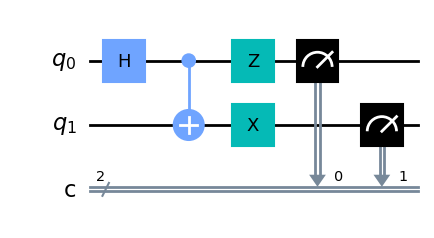

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.z(qreg_q[0])
circuit.x(qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])

display(circuit.draw("mpl"))

### 3. Initialize the Qiskit Runtime Sampler

In [3]:
from qiskit_ibm_runtime import Sampler

sampler = Sampler(backend=backend)

### 4. Invoke the Sampler and get results

In [4]:
job = sampler.run(circuit)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: cjqsesq7b8jcak59blo0
>>> Job Status: JobStatus.RUNNING


In [5]:
result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

>>> SamplerResult(quasi_dists=[{1: 0.47725, 2: 0.52275}], metadata=[{'shots': 4000}])
  > Quasi-probability distribution: {1: 0.47725, 2: 0.52275}
  > Metadata: {'shots': 4000}


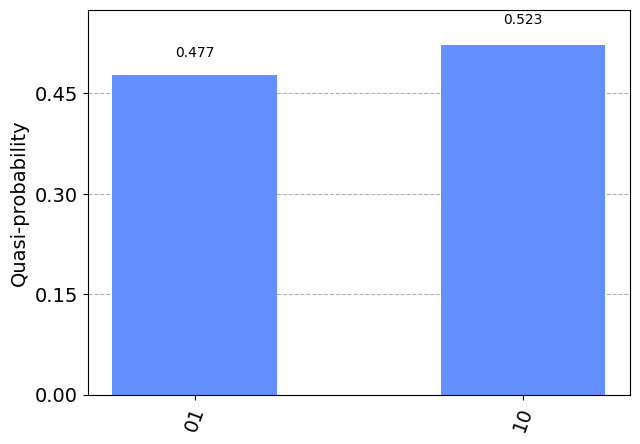

In [6]:
from qiskit.visualization import plot_histogram
plot_histogram(job.result().quasi_dists[0].binary_probabilities())